<p style="text-align: right;"> &#9989; Put your name here</p>

**Please read though the entire project before starting!**

# HW4a - Machine Leaning Using Optimization

In this homework you will work INDIVIDUALLY to run linear regression on the Boston Housing Data Set.

# Project Components and Grading

1. (40 points) Linear Regression
1. (60 points) Cross Validation

# 1. Boston Housing Data Set


In this homework, we will apply different regression analysis methods on the Boston Housing Data Set. 
The description of the data set can be found at http://facweb.cs.depaul.edu/mobasher/classes/CSC478/Data/housing-dscr.txt


There are 506 data samples (Instances) and there are 14 features (Attributes)  for each sample. The 14 Attributes are

1. CRIM: per capita crime rate by town
1. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
1. INDUS: proportion of non-retail business acres per town
1. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
1. NOX: nitric oxides concentration (parts per 10 million)
1. RM: average number of rooms per dwelling
1. AGE: proportion of owner-occupied units built prior to 1940
1. DIS: weighted distances to five Boston employment centres
1. RAD: index of accessibility to radial highways
1. TAX: full-value property-tax rate per \$10,000
1. PTRATIO: pupil-teacher ratio by town
1. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
1. LSTA: % lower status of the population
1. MEDV: Median value of owner-occupied homes in \$1000's

What we are going to do in this homework is to use regression analysis on this data set to model the relationship between the median value of owner-occupied homes in \$1000's (MEDV) and the other 13 attributes. In the first part of homework, we will apply least square.

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [3]:
import numpy as np
np.set_printoptions(precision=2, linewidth=120, suppress=True, edgeitems=4)
print(boston.data.shape)
print(boston.target.shape)
print(boston.data)

(506, 13)
(506,)
[[   0.01   18.      2.31    0.   ...,  296.     15.3   396.9     4.98]
 [   0.03    0.      7.07    0.   ...,  242.     17.8   396.9     9.14]
 [   0.03    0.      7.07    0.   ...,  242.     17.8   392.83    4.03]
 [   0.03    0.      2.18    0.   ...,  222.     18.7   394.63    2.94]
 ..., 
 [   0.05    0.     11.93    0.   ...,  273.     21.    396.9     9.08]
 [   0.06    0.     11.93    0.   ...,  273.     21.    396.9     5.64]
 [   0.11    0.     11.93    0.   ...,  273.     21.    393.45    6.48]
 [   0.05    0.     11.93    0.   ...,  273.     21.    396.9     7.88]]


# 2. Linear Regression

Given a data set $\{a_{i1},a_{i2},\cdots,a_{ip},b_i\}_{i=1}^n$ of $n$ data samples, a linear regression model assumes that the relationship between $y_i$ and the $p$ variables is linear. In this example, we have $n=506$ and $p=13$. The relationship is described as 
$$b_i = a_{i1}x_1+a_{i2}x_2 + \cdots + a_{ip}x_p+c+\epsilon_{i},$$
where $\epsilon_i$ is the error (or noise) and $c$ is the intercept that indicates the location where it intersects an axis when $a_{i1}=a_{i2}=\cdots=a_{ip}=0$. 

If we write this in a matrix form, it is 
$$b= Ax + c + \epsilon.$$
In our example, $A$ is the $506\times 13$ matrix from the boston.data. $x$ has all the 13 coefficients that we want to find and $c$ is the intercept. 

In order to solve this problem, we will rewrite $Ax + c$ into $[A~1] x$ by adding one column vector of all ones onto the matrix $A$ and then $x$ becomes a column vector of $p+1$ entries.

The simple linear regression is to 
$$\text{minimize}~ \|Ax-b\|^2$$

In [4]:
# In order to do multiple regression we need to add a column of 1s for A
A = np.array([np.concatenate((v,[1])) for v in boston.data])
b = boston.target
# First 10 elements of the data

print(A[:10])

# First 10 elements of the response variable
print(b[:10])

[[   0.01   18.      2.31    0.      0.54    6.58   65.2     4.09    1.    296.     15.3   396.9     4.98    1.  ]
 [   0.03    0.      7.07    0.      0.47    6.42   78.9     4.97    2.    242.     17.8   396.9     9.14    1.  ]
 [   0.03    0.      7.07    0.      0.47    7.18   61.1     4.97    2.    242.     17.8   392.83    4.03    1.  ]
 [   0.03    0.      2.18    0.      0.46    7.     45.8     6.06    3.    222.     18.7   394.63    2.94    1.  ]
 [   0.07    0.      2.18    0.      0.46    7.15   54.2     6.06    3.    222.     18.7   396.9     5.33    1.  ]
 [   0.03    0.      2.18    0.      0.46    6.43   58.7     6.06    3.    222.     18.7   394.12    5.21    1.  ]
 [   0.09   12.5     7.87    0.      0.52    6.01   66.6     5.56    5.    311.     15.2   395.6    12.43    1.  ]
 [   0.14   12.5     7.87    0.      0.52    6.17   96.1     5.95    5.    311.     15.2   396.9    19.15    1.  ]
 [   0.21   12.5     7.87    0.      0.52    5.63  100.      6.08    5.    311. 

In [5]:
# Problem data.
n,p = A.shape
b   = np.reshape(b,(n,1))

print(A.shape)
print(b.shape)

(506, 14)
(506, 1)


&#9989; **Do This:** 

- Write the code for solving the least square problem (minmize $\|Ax-b\|^2$) with all the 506 sample data using **cvxpy**.
    - You may need to go to http://www.cvxpy.org/en/latest/tutorial/functions/index.html for some functions
    - **Hint**: you may need to choose different solver that can be find from http://www.cvxpy.org/en/latest/tutorial/advanced/#solve-method-options
- After finding the $x$, comput the training **root mean square error** which is defined by 
$$rmse\_train = \sqrt{{1\over n}\sum_{i=1}^n(a_{i1}x_1+\cdots+a_{ip}x_p+c-b_i)^2}$$

In [6]:
#Replace the following and put your answer for x here
x = np.asmatrix(np.random.random([14,1]))

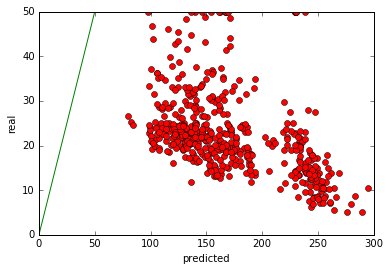

In [8]:
# Plot outputs
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(A*x, b,'ro')
plt.plot([0,50],[0,50], 'g-')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

# 3. Cross Validation (statistics)


Cross validation (CV) is a model validation technique that mainly used in settings where prediction is the goal and one wants to estimate the performance of a predictive model in practice. 

Remember in the machine learning in class assignments, we divide the data set into training and testing sets. Then we use the training data set to train the model and use the testing data set to validde the model. We found that the test error is larger than the training error because it can be overfitting in the training data. Cross validation is a way to predict the fit of a model when the explict testing samples are not available. 

Please see the figure below. We divide the sample into K parts (K=4 in the figure). Then for each iteration we choose one part as the testing set and the other as the training set, the trained model by using the K-1 parts is tested on the testing set. By doing this for K iterations, we combine all the test error as the final meassure for the fit of this model. 

For more information, you can go to https://en.wikipedia.org/wiki/Cross-validation_(statistics)

<img src="https://upload.wikimedia.org/wikipedia/commons/1/1c/K-fold_cross_validation_EN.jpg" width=480>

https://upload.wikimedia.org/wikipedia/commons/1/1c/K-fold_cross_validation_EN.jpg

&#9989; **Do This:** 

- Write the code for 10-fold Cross Validation. 
    - **Hint**: You can use KFold from sklearn to divide the samples
- Compute the Root Mean Sqared Error (RMSE) on 10-fold Cross-Validation

In [ ]:
from sklearn.cross_validation import KFold
# Put your answer here

In [9]:
from sklearn.cross_validation import KFold

##ANSWER##

# Now let's compute RMSE using 10-fold cross-validation
kf = KFold(len(A), n_folds=10)
xval_err = 0
xt = cvxpy.Variable(p,1)
for train,test in kf:
    At = A[train]
    bt = b[train]    
    objective = cvxpy.Minimize(cvxpy.sum_squares(At*xt-bt))
    prob = cvxpy.Problem(objective)
    result = prob.solve(solver = cvxpy.CVXOPT)
    e = A[test]*xt.value - b[test]
    xval_err += e.T.dot(e)
rmse_10cv = np.sqrt(xval_err/len(A))

##ANSWER##

NameError: name 'cvxpy' is not defined

In [ ]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

---------
### Turning in your homework

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's dropbox (Don't forget to add your names in the first cell).

&#169; Copyright 2017,  Michigan State University Board of Trustees